# Определение стоимости автомобилей

Компания, занимающаяся продажей подержанных автомобилей, разрабатывает приложение для привлечения новых клиентов, которое позволит быстро оценить рыночную стоимость своего автомобиля. У нас есть исторические данные, включающие технические характеристики, комплектации и цены автомобилей. Необходимо построить модель для определения стоимости автомобиля.

**Заказчику важны:**

- качество предсказания;
- скорость предсказания;
- время обучения.

**План выполнения проекта:**
1. Загрузить данные, путь к файлу: /datasets/autos.csv.
2. Изучить данные. Заполнить пропущенные значения и обработать аномалии в столбцах. Если среди признаков имеются неинформативные, удалить их.
3. Подготовить выборки для обучения моделей.
4. Обучить разные модели, одна из которых — LightGBM, как минимум одна — не бустинг. Для каждой модели попробовать разные гиперпараметры.
5. Проанализировать время обучения, время предсказания и качество моделей. Для оценки качества моделей применять метрику RMSE, ее значение должно быть меньше 2500.
6. Опираясь на критерии заказчика, выберете лучшую модель, проверьте её качество на тестовой выборке.


**Описание данных:**

* DateCrawled — дата скачивания анкеты из базы
* VehicleType — тип автомобильного кузова
* RegistrationYear — год регистрации автомобиля
* Gearbox — тип коробки передач
* Power — мощность (л. с.)
* Model — модель автомобиля
* Kilometer — пробег (км)
* RegistrationMonth — месяц регистрации автомобиля
* FuelType — тип топлива
* Brand — марка автомобиля
* Repaired — была машина в ремонте или нет
* DateCreated — дата создания анкеты
* NumberOfPictures — количество фотографий автомобиля
* PostalCode — почтовый индекс владельца анкеты (пользователя)
* LastSeen — дата последней активности пользователя
<br>

* Price *(целевой признак)* — цена (евро) 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-первичное-исследование-данных" data-toc-modified-id="Загрузка-и-первичное-исследование-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и первичное исследование данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li><li><span><a href="#Обработка-аномальных-значений" data-toc-modified-id="Обработка-аномальных-значений-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Обработка аномальных значений</a></span><ul class="toc-item"><li><span><a href="#Цена" data-toc-modified-id="Цена-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Цена</a></span></li><li><span><a href="#Год-регистрации" data-toc-modified-id="Год-регистрации-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Год регистрации</a></span></li><li><span><a href="#Мощность" data-toc-modified-id="Мощность-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Мощность</a></span></li><li><span><a href="#Пробег" data-toc-modified-id="Пробег-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Пробег</a></span></li></ul></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Подготовка-выборок" data-toc-modified-id="Подготовка-выборок-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка выборок</a></span></li><li><span><a href="#Константная-модель" data-toc-modified-id="Константная-модель-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Константная модель</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span><ul class="toc-item"><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#Проверка-лучшей-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-лучшей-модели-на-тестовой-выборке-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка лучшей модели на тестовой выборке</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Подготовка данных

### Загрузка и первичное исследование данных

In [2]:
import lightgbm as lgb
import pandas as pd
import re
import seaborn as sns

from catboost import CatBoostRegressor, Pool
from matplotlib import pyplot as plt
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

state = 321

<div class="alert alert-info">
Поправила
</div>

In [3]:
autos = pd.read_csv('/datasets/autos.csv')

In [4]:
autos.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [5]:
autos.shape

(354369, 16)

In [6]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [7]:
autos.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


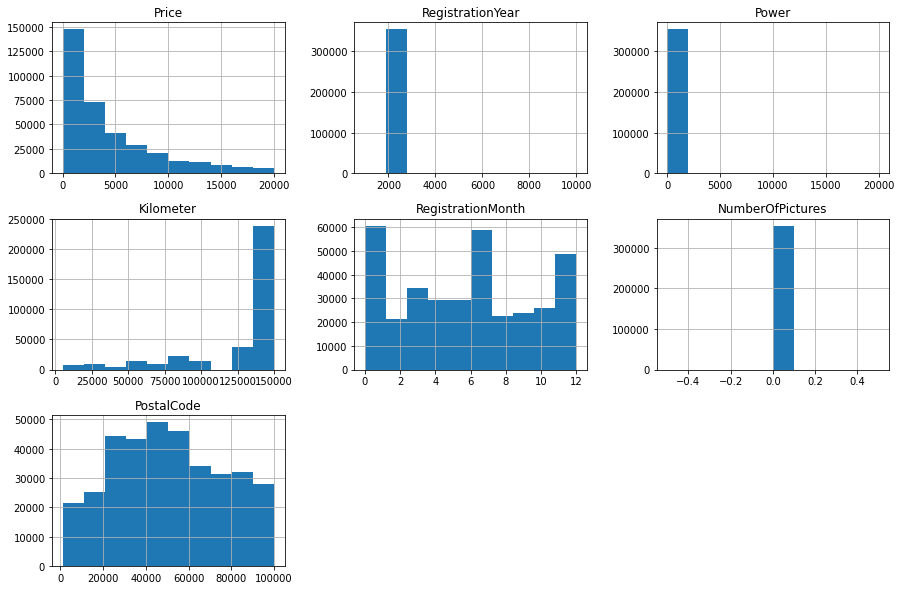

In [8]:
autos.hist(figsize=(15,10));

Достаточно странно, что у всех объявлений 0 фотографий - скорее всего это техническая ошибка, возникшая при выгрузке данных. Кроме того, вызывают вопросы объявления с ценой 0 и 0 лошадинных сил, а также с годом регистрации 1000 и месяцем регистрации 0. Рассмотрим это подробнее на этапе поиска выбросов.

Переименуем столбцы в соответствии с Snake Case для дальнейшего удобства обращения к ним.

In [9]:
new_names = new_dict_comp = {n:re.sub(r'(?<!^)(?=[A-Z])', '_', n).lower() for n in list(autos.columns)}
autos = autos.rename(columns=new_names)

### Обработка дубликатов

Проверим и удалим полные дубликаты при наличии.

In [10]:
autos.duplicated().sum()

4

In [11]:
autos = autos.drop_duplicates().reset_index(drop=True)
autos.duplicated().sum()

0

Проверим на наличие неявных дубликатов в названиях марок и моделей авто.

In [12]:
autos['brand'].unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi',
       'kia', 'suzuki', 'lancia', 'toyota', 'chevrolet', 'dacia',
       'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar', 'daewoo',
       'porsche', 'rover', 'land_rover', 'lada'], dtype=object)

In [13]:
autos['brand'].value_counts()

volkswagen        77012
opel              39931
bmw               36914
mercedes_benz     32044
audi              29456
ford              25179
renault           17927
peugeot           10998
fiat               9643
seat               6907
mazda              5615
skoda              5500
smart              5246
citroen            5148
nissan             4941
toyota             4606
hyundai            3587
sonstige_autos     3374
volvo              3210
mini               3202
mitsubishi         3022
honda              2817
kia                2465
suzuki             2322
alfa_romeo         2314
chevrolet          1754
chrysler           1439
dacia               900
daihatsu            806
subaru              762
porsche             758
jeep                677
trabant             589
land_rover          545
daewoo              542
saab                526
jaguar              505
rover               486
lancia              471
lada                225
Name: brand, dtype: int64

Сомнения тут вызывает только land_rover и rover, погуглив, находим такую информацию:
> Land Rover – это британская компания, которая основана в 1948 году. В период с 2000 по 2005 годы существовал концерн MG Rover Group, который выпускал автомобили под названием Rover. 

In [14]:
autos['model'].unique()

array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'other', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
       'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
       '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza', 'mustang',
       'eos', 'touran', 'getz', 'a3', 'almera', 'megane', 'lupo', 'r19',
       'zafira', 'caddy', 'mondeo', 'cordoba', 'colt', 'impreza',
       'vectra', 'berlingo', 'tiguan', 'i_reihe', 'espace', 'sharan',
       '6_reihe', 'panda', 'up', 'seicento', 'ceed', '5_reihe', 'yeti',
       'octavia', 'mii', 'rx_reihe', '6er', 'modus', 'fox'

In [15]:
autos['model'].value_counts().tail(15)

200                   18
materia               18
amarok                16
kappa                 15
q3                    15
samara                13
gl                    13
elefantino            11
kalina                 9
serie_2                8
i3                     8
rangerover             4
serie_3                4
range_rover_evoque     2
serie_1                2
Name: model, dtype: int64

Можно заметить, что встречается и 'rangerover', и 'range_rover'. Это определенно одно и то же, приведем их к общему виду.

In [16]:
autos.loc[autos['model'] == 'rangerover', 'model'] = 'range_rover'

In [17]:
autos['model'].value_counts().tail(15)

musa                  25
materia               18
200                   18
amarok                16
q3                    15
kappa                 15
gl                    13
samara                13
elefantino            11
kalina                 9
serie_2                8
i3                     8
serie_3                4
serie_1                2
range_rover_evoque     2
Name: model, dtype: int64

### Заполнение пропусков

Для начала удалим столбцы с нерелевантной информацией ('DateCrawled','DateCreated','LastSeen','NumberOfPictures','PostalCode') - в них не содержится информация непосредственно об автомобиле, цену которого мы предсказываем. Это, скорее, техническая информация о самом объявлении. 

In [18]:
print(autos['date_crawled'].max()) # максимальная дата 
print(autos['date_crawled'].min())

2016-04-07 14:36:58
2016-03-05 14:06:22


Запомним, что все объявления собраны в 2016 году.

In [19]:
autos = autos.drop(['date_crawled','date_created','last_seen','number_of_pictures','postal_code', 'registration_month'],axis = 1)

Проверим пропуски

In [20]:
nulls = pd.concat([autos.isna().sum(), autos.isna().mean() * 100], axis=1)
nulls.columns = ['Пропусков', '%']
print(nulls)

                   Пропусков          %
price                      0   0.000000
vehicle_type           37490  10.579487
registration_year          0   0.000000
gearbox                19833   5.596772
power                      0   0.000000
model                  19705   5.560651
kilometer                  0   0.000000
fuel_type              32895   9.282802
brand                      0   0.000000
repaired               71154  20.079297


Пропуски у нас в следующих столбцах:
* vehicle_type — тип автомобильного кузова
* gearbox — тип коробки передач
* model — модель автомобиля
* fuel_type — тип топлива
* repaired — была машина в ремонте или нет

Все они достаточно критичны для стоимости авто.


In [21]:
autos[autos['model'] == 'polo'].sample(20, random_state=state)

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
109630,8950,small,2012,manual,69,polo,70000,petrol,volkswagen,no
209977,14490,small,2013,NaN,0,polo,40000,gasoline,volkswagen,no
100406,9499,small,2010,manual,90,polo,80000,gasoline,volkswagen,no
65653,2000,small,2002,manual,65,polo,150000,NaN,volkswagen,NaN
135054,12500,small,2011,auto,179,polo,70000,petrol,volkswagen,no
156297,1149,small,1997,manual,0,polo,20000,petrol,volkswagen,no
9589,5350,sedan,2007,manual,70,polo,150000,petrol,volkswagen,no
252725,1590,small,1999,manual,60,polo,150000,petrol,volkswagen,no
195303,2750,small,2005,manual,54,polo,150000,petrol,volkswagen,no
253052,2399,small,2000,manual,75,polo,125000,petrol,volkswagen,no


Как можно заметить на примере с Поло выше, в рамках одной модели машины может отличаться и тип кузова, и тип коробки передач, и тип топлива, и тип кузова, а значит однозначно восстановить пропуски на основе этой информации нельзя.

Заполним пропуски в столбце model заглушкой-значением 'unknown'.

In [22]:
autos['model'] = autos['model'].fillna('unknown') 

Рассмотрим уникальные значения в оставшихся столбцах.

In [23]:
autos['vehicle_type'].unique()

array([nan, 'coupe', 'suv', 'small', 'sedan', 'convertible', 'bus',
       'wagon', 'other'], dtype=object)

In [24]:
autos['gearbox'].unique()

array(['manual', 'auto', nan], dtype=object)

In [25]:
autos['fuel_type'].unique()

array(['petrol', 'gasoline', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

In [26]:
autos['fuel_type'].value_counts()

petrol      216349
gasoline     98719
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: fuel_type, dtype: int64

Стоит заметить, что petrol и gasoline означают одно и то же - бензин, поэтому сначала мы заменим все gasoline на petrol.

In [27]:
autos.loc[autos['fuel_type'] == 'gasoline', 'fuel_type'] = 'petrol'

In [28]:
autos['fuel_type'].value_counts()

petrol      315068
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: fuel_type, dtype: int64

Теперь начнем непосредственно заполнять пропуски.

In [29]:
autos['repaired'].value_counts()

no     247158
yes     36053
Name: repaired, dtype: int64

С одной стороны - скорее всего, если человек не указывает, что ремонт был, то скорее всего его не было. С другой стороны - пропусков в этом столбце почти 20 процентов, и неверное понимание причины их появления и последующее заполнение может существенно изменить картину. Заполним пропуски в этом столбце значением 'unknown'.

In [30]:
autos['repaired'] = autos['repaired'].fillna('unknown')

Пропуски в остальных столбцах также заменим на 'unknown'.

In [31]:
autos['fuel_type'] = autos['fuel_type'].fillna('unknown')
autos['gearbox'] = autos['gearbox'].fillna('unknown')
autos['vehicle_type'] = autos['vehicle_type'].fillna('unknown')

In [32]:
autos.isna().sum()

price                0
vehicle_type         0
registration_year    0
gearbox              0
power                0
model                0
kilometer            0
fuel_type            0
brand                0
repaired             0
dtype: int64

Пропуски заполнены, переходим к обработке выбросов.

### Обработка аномальных значений

In [33]:
autos.describe()

,price,registration_year,power,kilometer
count,354365.000000,354365.000000,354365.000000,354365.000000
mean,4416.679830,2004.234481,110.093816,128211.363989
std,4514.176349,90.228466,189.851330,37905.083858
min,0.000000,1000.000000,0.000000,5000.000000
25%,1050.000000,1999.000000,69.000000,125000.000000
50%,2700.000000,2003.000000,105.000000,150000.000000
75%,6400.000000,2008.000000,143.000000,150000.000000
max,20000.000000,9999.000000,20000.000000,150000.000000


Будем рассматривать столбцы по очереди.
#### Цена

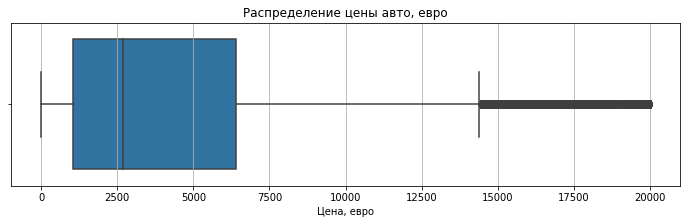

In [34]:
a4_dims = (12, 3)
fig, ax = plt.subplots(figsize=a4_dims)
plt.grid(True)
plt.title('Распределение цены авто, евро')
sns.boxplot(x=autos['price'], orient='h')
plt.xlabel('Цена, евро');

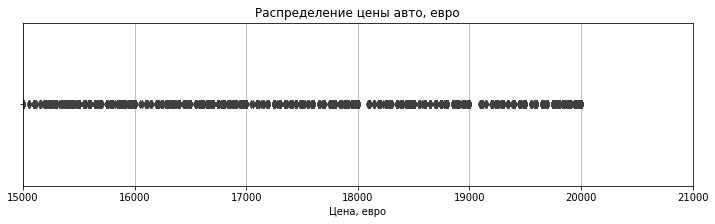

In [35]:
a4_dims = (12, 3)
fig, ax = plt.subplots(figsize=a4_dims)
plt.grid(True)
plt.title('Распределение цены авто, евро')
sns.boxplot(x=autos['price'], orient='h')
plt.xlabel('Цена, евро')
plt.xlim(left=15000);

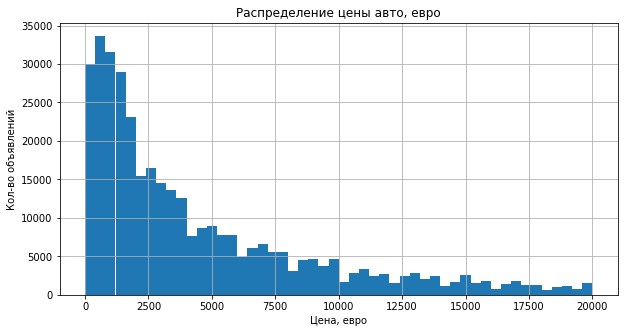

In [36]:
autos['price'].hist(bins=50, figsize=(10, 5))
plt.title('Распределение цены авто, евро')
plt.xlabel('Цена, евро')
plt.ylabel('Кол-во объявлений');

20000 евро может быть реальной ценой для авто, тем более значений приближенных к этому числу не одно-два. Ограничивать сверху не будем. Снизу нужно рассмотреть детальнее. 

Какая минимальная возможная цена для авто? 

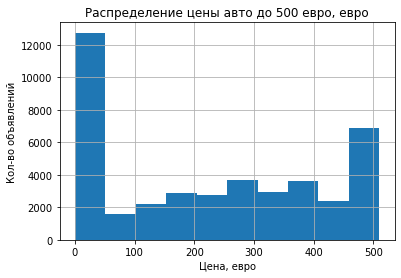

In [37]:
autos.loc[autos['price'] < 511, 'price'].hist()
plt.title('Распределение цены авто до 500 евро, евро')
plt.xlabel('Цена, евро')
plt.ylabel('Кол-во объявлений');

In [38]:
autos[autos['price'] < 50]

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
7,0,sedan,1980,manual,50,other,40000,petrol,volkswagen,no
40,0,unknown,1990,unknown,0,corsa,150000,petrol,opel,unknown
59,1,suv,1994,manual,286,unknown,150000,unknown,sonstige_autos,unknown
89,1,sedan,1995,manual,113,e_klasse,150000,petrol,mercedes_benz,no
111,0,unknown,2017,manual,0,golf,5000,petrol,volkswagen,unknown
...,...,...,...,...,...,...,...,...,...,...
354201,0,unknown,2000,manual,65,corsa,150000,unknown,opel,yes
354234,0,small,2002,manual,60,fiesta,150000,petrol,ford,unknown
354244,0,small,1999,manual,53,swift,150000,petrol,suzuki,unknown
354273,0,small,1999,manual,37,arosa,150000,petrol,seat,yes


In [39]:
autos.loc[autos['price'] <= 50, 'price'].value_counts()

0     10772
1      1189
50      327
10       84
30       55
20       51
40       45
25       33
15       27
5        26
35       18
45       16
2        12
49       12
8         9
9         8
3         8
12        8
13        7
39        6
14        5
11        5
17        5
19        3
18        3
7         3
29        2
16        2
4         1
27        1
26        1
21        1
33        1
32        1
38        1
24        1
47        1
Name: price, dtype: int64

Подобные значения явно не помогут нам в предсказании, так как бесплатно автомобили все еще не раздают. Возможно, ноль проставляется при выгрузке в объявлениях, в которых цена не указана? 

Отчистим данные от всех объявлений ценой ниже 50 евро - это нереалистичные цены на авто, даже нерабочие.

In [40]:
autos = autos[autos['price'] >= 50]

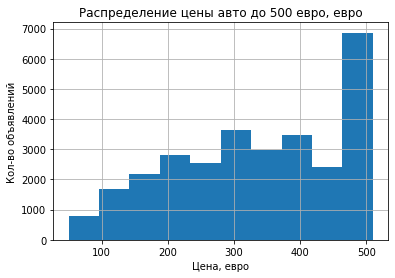

In [41]:
autos.loc[autos['price'] < 511, 'price'].hist()
plt.title('Распределение цены авто до 500 евро, евро')
plt.xlabel('Цена, евро')
plt.ylabel('Кол-во объявлений');

#### Год регистрации

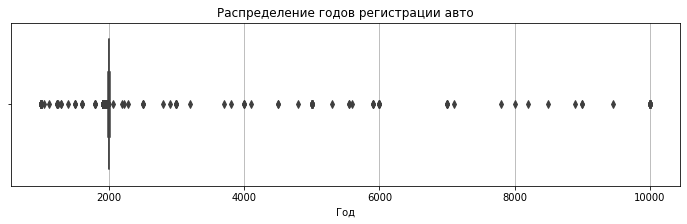

In [42]:
a4_dims = (12, 3)
fig, ax = plt.subplots(figsize=a4_dims)
plt.grid(True)
plt.title('Распределение годов регистрации авто')
sns.boxplot(x=autos['registration_year'], orient='h')
plt.xlabel('Год');

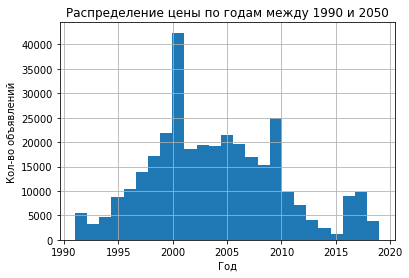

In [43]:
autos.loc[(autos['registration_year'] < 2050) & (autos['registration_year'] > 1990), 'registration_year'].hist(bins=25)
plt.title('Распределение цены по годам между 1990 и 2050')
plt.xlabel('Год')
plt.ylabel('Кол-во объявлений');

In [44]:
autos['registration_year'].describe()

count    341942.000000
mean       2004.079774
std          77.070996
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: registration_year, dtype: float64

Максимальная дата загрузки объявлений была в 2016 году. 

In [45]:
autos.loc[autos['registration_year'] > 2016, 'registration_year'].value_counts()

2017    9841
2018    3766
9999      18
2019      16
5000      14
6000       5
3000       5
7000       4
2500       3
4000       3
5911       2
4500       2
9000       2
5555       2
5300       1
4100       1
9450       1
3700       1
5900       1
2900       1
2222       1
8500       1
7800       1
8888       1
8200       1
8000       1
2200       1
2290       1
2066       1
5600       1
4800       1
3800       1
3200       1
2800       1
7100       1
Name: registration_year, dtype: int64

In [46]:
autos[autos['registration_year'] > 2016]

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
22,2900,unknown,2018,manual,90,meriva,150000,petrol,opel,no
26,5555,unknown,2017,manual,125,c4,125000,unknown,citroen,no
48,7750,unknown,2017,manual,80,golf,100000,petrol,volkswagen,unknown
51,2000,unknown,2017,manual,90,punto,150000,petrol,fiat,yes
57,2399,unknown,2018,manual,64,other,125000,unknown,seat,no
...,...,...,...,...,...,...,...,...,...,...
354108,3600,unknown,2017,manual,86,transit,150000,petrol,ford,unknown
354136,1000,unknown,2017,manual,101,a4,150000,unknown,audi,unknown
354199,2140,unknown,2018,manual,80,fiesta,150000,unknown,ford,no
354249,1250,unknown,2018,unknown,0,corsa,150000,petrol,opel,unknown


Данных выше 2016 достаточно много, и просто удалить их как в целевом признаке будет нецелесообразно. Пропуски заполним медианой по модели, а также удалим данные до 1970 - это раритетные авто, а их стоимость считается не так, как у современных авто.

In [47]:
autos = autos[autos['registration_year'] >= 1970]
autos.loc[autos['registration_year'] > 2017, 'registration_year'] = None

In [48]:
def nummedfill(column):
    print('Пропусков до:', autos[column].isna().sum())
    print('Уникальных значений до:\n', autos[column].value_counts(), sep='')
    autos[column] = autos.groupby('model')[column].transform(
        lambda x: x.fillna(round(x.median())))
    autos[column] = autos[column].astype('int')
    print()
    print('Пропусков после', autos[column].isna().sum())
    print('Уникальный значений после:\n', autos[column].value_counts(), sep='')

In [49]:
nummedfill('registration_year')

Пропусков до: 3863
Уникальных значений до:
2000.0    22818
1999.0    21896
2005.0    21404
2006.0    19650
2001.0    19591
2003.0    19457
2004.0    19305
2002.0    18679
1998.0    17094
2007.0    16986
2008.0    15235
2009.0    14378
1997.0    13923
2010.0    10667
1996.0    10320
2017.0     9841
2011.0     9816
2016.0     8899
1995.0     8804
2012.0     7109
1994.0     4592
2013.0     4083
1993.0     3243
1992.0     2837
1991.0     2601
2014.0     2498
1990.0     2399
1989.0     1225
2015.0     1177
1988.0      896
1985.0      655
1987.0      624
1986.0      494
1980.0      465
1983.0      400
1984.0      382
1982.0      299
1978.0      272
1970.0      266
1979.0      265
1981.0      249
1972.0      209
1977.0      167
1974.0      167
1973.0      163
1971.0      159
1976.0      154
1975.0      136
Name: registration_year, dtype: int64

Пропусков после 0
Уникальный значений после:
2000    23016
1999    21913
2005    21665
2001    21008
2006    19852
2003    19755
2004    19639
2002   

In [50]:
autos['registration_year'] = autos['registration_year'].astype('int')

#### Мощность

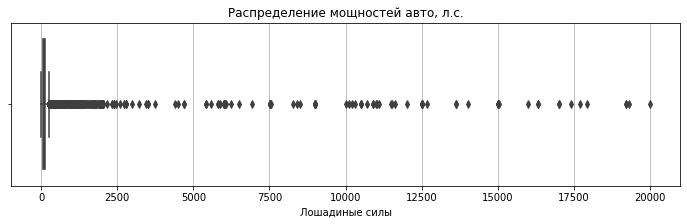

In [51]:
a4_dims = (12, 3)
fig, ax = plt.subplots(figsize=a4_dims)
plt.grid(True)
plt.title('Распределение мощностей авто, л.с.')
sns.boxplot(x=autos['power'], orient='h')
plt.xlabel('Лошадиные силы');

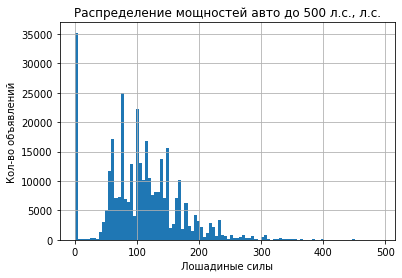

In [52]:
autos.loc[autos['power'] < 500, 'power'].hist(bins=100)
plt.title('Распределение мощностей авто до 500 л.с., л.с.')
plt.xlabel('Лошадиные силы')
plt.ylabel('Кол-во объявлений');

In [53]:
autos['power'].value_counts()

0        35128
75       23214
60       15399
150      14101
101      12928
         ...  
671          1
15001        1
1360         1
6226         1
1416         1
Name: power, Length: 692, dtype: int64

У нас есть очень много нулевых аномалий, а также достаточно больших значений. Будем считать, что нормальная мощность легковых авто находится в границах от 20 до 700 л.с.

Так как переменная количественная, будем заменять аномалии медианой. При попытке это сделать выяснилось, что есть некая модель машины, у которой ни разу не указано значение мощности. Найдем ее и заполним его вручную.

In [54]:
zero_power_persent = autos[autos["power"] == 0].groupby("model")["power"].count() / autos.groupby("model")["power"].count()
zero_power_persent.dropna(inplace=True)
zero_power_persent.sort_values(ascending=False)

model
serie_1    1.000000
samara     0.583333
kalina     0.444444
i3         0.375000
601        0.351351
             ...   
eos        0.015595
s_max      0.011601
up         0.011561
s60        0.006897
yeti       0.005747
Name: power, Length: 243, dtype: float64

In [55]:
autos.query('model == "serie_1"')

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
234294,3800,wagon,1978,manual,0,serie_1,30000,petrol,land_rover,unknown


Согласно информации [вот здесь](https://wroom.ru/cars/landrover/series) мощность этого авто 51 л.с. Заполним.

In [56]:
autos.loc[autos['model'] == 'serie_1', 'power'] = 51

In [57]:
autos.loc[autos['power'] < 20, 'power'] = None
autos.loc[autos['power'] > 700, 'power'] = None
nummedfill('power')

Пропусков до: 35793
Уникальных значений до:
75.0     23214
60.0     15399
150.0    14101
101.0    12928
140.0    12681
         ...  
682.0        1
449.0        1
541.0        1
607.0        1
327.0        1
Name: power, Length: 433, dtype: int64

Пропусков после 0
Уникальный значений после:
75     24599
60     19987
101    16389
150    15718
90     13136
       ...  
584        1
331        1
332        1
685        1
700        1
Name: power, Length: 433, dtype: int64


#### Пробег

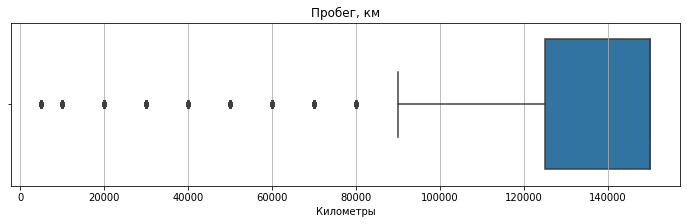

In [58]:
a4_dims = (12, 3)
fig, ax = plt.subplots(figsize=a4_dims)
plt.grid(True)
plt.title('Пробег, км')
sns.boxplot(x=autos['kilometer'], orient='h')
plt.xlabel('Километры');

In [59]:
autos['kilometer'].unique()

array([150000, 125000,  90000,  30000,  70000, 100000,  60000,   5000,
        20000,  80000,  50000,  40000,  10000])

Так как значений этого признака мало, его можно рассматривать как категориальный - скорее всего, на сайте доступен выбор из нескольких вариантов.

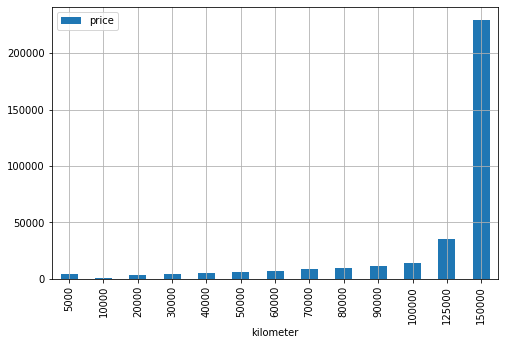

In [60]:
autos.pivot_table(index='kilometer', values='price', aggfunc='count').reset_index().\
    plot(kind='bar', x='kilometer', y='price', grid=True, figsize=(8,5));

Выбросов в этом столбце не наблюдается, необходимости отчищать от них данные нет. Так как признак категориальный, приведем его к типу object.

In [61]:
autos['kilometer'] = autos['kilometer'].astype('object')

In [64]:
print(f'Удалено {round((354369 - autos.shape[0]) / 354369, 4) * 100}% строк')

Удалено 3.83% строк


## Обучение моделей

### Подготовка выборок
Для начала разделим выборку на обучающую и тестовую.

In [66]:
features = autos.drop('price', axis=1)
target = autos['price']

In [67]:
features_train, features_test, target_train, target_test = train_test_split(features, target, \
                                                                                  test_size=0.25, random_state=state)

В качестве модели, не использующей бустинг, мы будем использовать случайный лес. Для него мы закодируем категориальные перемнные с помощью порядкового кодирования, так как прямое кодирование приведет к слишком большому количеству признаков.

In [68]:
encoder = OrdinalEncoder() 
encoder.fit(features)
features_train_ord = pd.DataFrame(encoder.transform(features_train), 
                                                      columns=features_train.columns)
features_test_ord = pd.DataFrame(encoder.transform(features_test), 
                                                      columns=features_test.columns) 

In [69]:
numeric = ['registration_year', 'power']

In [70]:
scaler = StandardScaler()
pd.options.mode.chained_assignment = None
scaler.fit(features_train_ord[numeric])
features_train_ord[numeric] = scaler.transform(features_train_ord[numeric])
features_test_ord[numeric] = scaler.transform(features_test_ord[numeric])

scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

### Константная модель

Посчитаем RMSE для константной модели - в дальнейшем сможем оценивать адекватность моделей по этому результату.

In [71]:
dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(features_train_ord, target_train)
dummy_pred = dummy_regr.predict(features_test_ord)
mean_squared_error(target_test, dummy_pred) ** 0.5

4503.036749723433

### Случайный лес

In [72]:
rf = RandomForestRegressor(random_state=state)
forest_params = {
    'max_depth': range(3, 11, 2),
    'n_estimators': (15, 50, 100, 150) 
}

forest = GridSearchCV(rf, 
                      forest_params, 
                      cv=3, 
                      verbose=2, 
                      scoring='neg_root_mean_squared_error')

forest.fit(features_train_ord, target_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END .......................max_depth=3, n_estimators=15; total time=   1.3s
[CV] END .......................max_depth=3, n_estimators=15; total time=   1.3s
[CV] END .......................max_depth=3, n_estimators=15; total time=   1.3s
[CV] END .......................max_depth=3, n_estimators=50; total time=   4.3s
[CV] END .......................max_depth=3, n_estimators=50; total time=   4.3s
[CV] END .......................max_depth=3, n_estimators=50; total time=   4.2s
[CV] END ......................max_depth=3, n_estimators=100; total time=   8.5s
[CV] END ......................max_depth=3, n_estimators=100; total time=   8.6s
[CV] END ......................max_depth=3, n_estimators=100; total time=   8.4s
[CV] END ......................max_depth=3, n_estimators=150; total time=  12.7s
[CV] END ......................max_depth=3, n_estimators=150; total time=  12.7s
[CV] END ......................max_depth=3, n_es

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=321),
             param_grid={'max_depth': range(3, 11, 2),
                         'n_estimators': (15, 50, 100, 150)},
             scoring='neg_root_mean_squared_error', verbose=2)

In [73]:
forest.best_params_

{'max_depth': 9, 'n_estimators': 150}

In [74]:
forest.best_score_ * -1

1982.298566366232

In [75]:
forest.best_estimator_.feature_importances_

array([0.02240263, 0.58159767, 0.00328586, 0.3062609 , 0.00633075,
       0.05295033, 0.00079214, 0.01466403, 0.01171569])

In [76]:
features_train.columns

Index(['vehicle_type', 'registration_year', 'gearbox', 'power', 'model',
       'kilometer', 'fuel_type', 'brand', 'repaired'],
      dtype='object')

Можно заметить, что больше всего на результат влияет год регистрации, а меньше всего - тип топлива и тип коробки передач.

### LightGBM

In [77]:
features_train_light = features_train.copy().astype(
    {'vehicle_type':'category',
    'gearbox':'category',
    'model':'category',
    'fuel_type':'category',
    'brand':'category',
    'repaired':'category',
    'kilometer':'category'})
features_test_light = features_test.copy().astype(
    {'vehicle_type':'category',
    'gearbox':'category',
    'model':'category',
    'fuel_type':'category',
    'brand':'category',
    'repaired':'category',
    'kilometer':'category'})

In [78]:
lgbm = lgb.LGBMRegressor(objective='regression', random_state=state)

lgb_params = {
      'learning_rate': [0.1, 0.01],
      'n_estimators': [100, 300, 500],
      'max_depth': [4, 7, 10],
}

lgbmachine = GridSearchCV(estimator=lgbm, 
                     param_grid=lgb_params,
                     cv=3,
                     verbose=2,
                     scoring='neg_root_mean_squared_error')

lgbmachine.fit(features_train_light, target_train)
  

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   3.4s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   3.6s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   3.6s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=300; total time=   9.2s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=300; total time=   9.3s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=300; total time=   9.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=500; total time=  15.0s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=500; total time=  14.8s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=500; total time=  14.8s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   5.2s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   7.9s
[CV] END ...learning_rate=0.1, max_depth=7, n_es

GridSearchCV(cv=3,
             estimator=LGBMRegressor(objective='regression', random_state=321),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [4, 7, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [79]:
lgbmachine.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500}

In [80]:
lgbmachine.best_score_ * -1

1609.5996585308342

In [81]:
lgbmachine.best_estimator_.feature_importances_

array([ 923, 3676,  636, 4108, 2672, 1296,   87,  995,  607], dtype=int32)

### CatBoost

In [82]:
cat_autos = Pool(features_train, target_train, cat_features=['vehicle_type', 'gearbox', 'model', 
                                                             'fuel_type', 'brand', 'repaired'])

In [83]:
catboost = CatBoostRegressor(loss_function='RMSE', random_state=state)


cat_params = {
      'learning_rate': [0.1, 0.01],
      'depth': [4, 7, 10],
}

catboost_grid = catboost.grid_search(cat_params, 
                                     cat_autos,
                                     cv=3,
                                     verbose=False,
                                     plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 5907.8790992	test: 5920.9392169	best: 5920.9392169 (0)	total: 298ms	remaining: 4m 58s
1:	learn: 5460.7342285	test: 5472.0825794	best: 5472.0825794 (1)	total: 501ms	remaining: 4m 10s
2:	learn: 5067.8502863	test: 5080.2680183	best: 5080.2680183 (2)	total: 716ms	remaining: 3m 57s
3:	learn: 4712.3565662	test: 4724.1840560	best: 4724.1840560 (3)	total: 901ms	remaining: 3m 44s
4:	learn: 4399.1063692	test: 4408.6022514	best: 4408.6022514 (4)	total: 1.06s	remaining: 3m 31s
5:	learn: 4126.3163086	test: 4135.6840526	best: 4135.6840526 (5)	total: 1.25s	remaining: 3m 27s
6:	learn: 3888.2279573	test: 3896.4052497	best: 3896.4052497 (6)	total: 1.45s	remaining: 3m 26s
7:	learn: 3677.3892411	test: 3684.7740778	best: 3684.7740778 (7)	total: 1.62s	remaining: 3m 20s
8:	learn: 3497.5755982	test: 3504.0419589	best: 3504.0419589 (8)	total: 1.77s	remaining: 3m 14s
9:	learn: 3332.1824908	test: 3338.0555138	best: 3338.0555138 (9)	total: 1.93s	remaining: 3m 11s
10:	learn: 3194.7117967	test: 3199.87455

In [84]:
catboost_grid['params']

{'depth': 10, 'learning_rate': 0.1}

## Анализ моделей

Теперь, после подбора гиперпараметров, замерим время обучения и предсказания у каждой модели.

### Случайный лес

In [86]:
%%time

model_rf = RandomForestRegressor(n_estimators=150, max_depth=9, random_state=state)
model_rf.fit(features_train_ord, target_train)

CPU times: user 49.7 s, sys: 71.2 ms, total: 49.7 s
Wall time: 50.1 s


RandomForestRegressor(max_depth=9, n_estimators=150, random_state=321)

In [87]:
%%time

predictions_rf = model_rf.predict(features_test_ord)

CPU times: user 952 ms, sys: 0 ns, total: 952 ms
Wall time: 950 ms


### LightGBM

In [88]:
%%time

model_lgbm = lgb.LGBMRegressor(objective='regression', 
                              random_state=state, 
                              learning_rate=0.1, 
                              max_depth=10, 
                              n_estimators=500)

model_lgbm.fit(features_train_light, target_train)

CPU times: user 20.1 s, sys: 190 ms, total: 20.3 s
Wall time: 20.5 s


LGBMRegressor(max_depth=10, n_estimators=500, objective='regression',
              random_state=321)

In [89]:
%%time

predictions_lgbm = model_lgbm.predict(features_test_light)

CPU times: user 3.78 s, sys: 10.6 ms, total: 3.79 s
Wall time: 3.75 s


### CatBoost

In [91]:
%%time

model_cat = CatBoostRegressor(depth=10, 
                              learning_rate=0.1,
                              loss_function='RMSE',
                              random_state=state,
                              verbose=0)
model_cat.fit(cat_autos)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

CPU times: user 10min 29s, sys: 1.61 s, total: 10min 31s
Wall time: 10min 32s


In [92]:
%%time
predictions_cat = model_cat.predict(features_test)

CPU times: user 1.84 s, sys: 0 ns, total: 1.84 s
Wall time: 1.85 s


*****
Представим сравнение в табличном виде для наглядности.

In [93]:
df = pd.DataFrame([['Random Forest', '49.7 s', '50.1 s', '952 ms', '950 ms', 1982.30], 
                   ['LightGBM', '20.3 s', '20.5 s', '3.79 s', '3.75 s', 1609.60], 
                   ['CatBoost', '10min 31s', '10min 32s', '1.84 s', '1.85 s', 1576.55]], 
                   columns=['Model', 'Fitting CPU time', 'Fitting Wall time', 
                            'Predicting CPU time', 'Predicting Wall time', 'RMSE on CV'])

In [94]:
df

,Model,Fitting CPU time,Fitting Wall time,Predicting CPU time,Predicting Wall time,RMSE on CV
0,Random Forest,49.7 s,50.1 s,952 ms,950 ms,1982.30
1,LightGBM,20.3 s,20.5 s,3.79 s,3.75 s,1609.60
2,CatBoost,10min 31s,10min 32s,1.84 s,1.85 s,1576.55


Лучшее значение RMSE у CatBoost, а худшее - у Random Forest. При этом CatBoost затрачивает на обучение примерно в 30 раз больше времени, чем LightGBM, и в 10 раз больше, чем RF. Лучшее время предсказания - у RF.

В качестве лучшей модели предлагается выбрать CatBoost, так как ее значение RMSE выше всех, а время предсказание среднее. Долготу обучения модели нивелирует то, что обучается она редко (в идеале - единожды), а предсказывает - часто (и важно делать это быстро и максимально качественно).

### Проверка лучшей модели на тестовой выборке

In [96]:
mean_squared_error(target_test, predictions_cat) ** 0.5

1586.4550396013076

## Вывод

Для проекта были предоставлены исторические данные о технических характеристиках, комплектации и ценах автомобилей в объеме около 355 тысяч строк.<br>
В ходе предобработки данных были удалены столбцы с нерелевантной информацией, выявлены и устранены явные и неявные дубликаты, заполнены пропуски, а также обработаны аномальные значения. Стоит заметить, что выбросов в данных было достаточно много, возможно проблема возникает на этапе выгрузки или занесения данных в таблицу. <br>
По итогам предобработки было удалено 8,25% строк с некачественными данными. <br.
Затем данные были мастабированы и обработаны в соответствии с необходимостями моделей. 

В качестве вариантов модели рассматривались Random Forest, LightGBM и CatBoost. Их итоговое сравнение представлено в таблице выше.
* Random Forest имеет среднее время обучения, наименьшее время предсказания и худшее значение RMSE.
* LightGBM обучается быстрее всего, имеет среднюю RMSE и предсказывает дольше всех.
* CatBoost учится дольше всех, но показывает лучшую RMSE и среднее время предсказания.

Руководствуясь тем, что модель обучается редко (в идеале - единожды), а предсказывает - часто, и важно, чтобы она делала это быстро и качественно, лучшей моделью была выбрана CatBoost.

На тестовой выборке эта модель показала результат RMSE 1586.46.